Préambule: l'objectif de ce notebook est de présenter de manière assez succinte l'étude des données via des outils comme pandas, numpy et matplotlib

Les données sont issus de la compétition Kaggle [Titanic: Machine Learning for Disaster](https://www.kaggle.com/c/titanic/data).

# 1. Récupération et traitement des données 

## 1.1 Téléchargement des données 

Télécharger les fichiers train.csv et test.csv et mettez-les dans votre répertoire de travail

## 1.2 Import des packages nécessaires à la manipulation des données

In [1]:
#Installer ces packages via pip dans votre terminal si jamais ils ne sont pas installés
import pandas as pd
import numpy as np

Avoir de l'aide sur une commande: entrez dans une cellule de code le nom de la commande suivi de ? Ex: pd.read_csv?



In [2]:
#La commande index_col indique la variable qui va être considérée comme Id. 
train = pd.read_csv("train.csv", index_col = "PassengerId")
test = pd.read_csv("test.csv", index_col = "PassengerId")

## 1.3 Premières manipulations sur le jeu de données


In [3]:
print(np.shape(train), np.shape(test))

(891, 11) (418, 10)


#### Q.1: Pourquoi y a t'il une différence du nombre de colonnes entre train et test ? 

Réponse: 


train > pour l'apprentissage.
test > pour jeu de données de test ou d'évaluation.


Par la suite, on ne va manipuler que le jeu de données train

### 1.3.1 Visualisation du jeu de données train

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train[:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [6]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 1.3.2 Sélection de lignes 

In [7]:
#Selection par l'index de la colonne (PassengerID)
train.loc[1]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

In [8]:
#Selection par la position de l'observation
train.iloc[0]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

### 1.3.3 Sélection de colonnes 

In [9]:
#10 premières lignes de la variable Age 
train.Age[:10]

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [10]:
#De même via une autre commande
train.loc[:10, "Age"]

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

## 1.4 Extraction d'informations

### 1.4.1 Valeurs manquantes 

Un dataset comporte quasi systématiquement des valeurs manquantes, il est important de les repérer et on verra par la suite quelles solutions mettre en oeuvre pour contourner ce problème

In [11]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 1.4.2 Type de variables

In [12]:
print(type(train.loc[1,"Age"]))

<class 'numpy.float64'>


In [13]:
#Raccourci pour avoir tout les types renseignés (le type object peut représenter différents sous-types)
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

#### Q.2 Quel est le type de la variable Cabin ? 

Réponse: 

type float


### 1.4.3 Modalités par variable

In [14]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

#### Q.3 Combien de modalités différentes prend la variable Cabin ? (i.e combien de type de cabine différentes existent sur le bateau ?)

In [15]:
compteur = 0
for i in train.Cabin.unique():
    compteur += 1
print(compteur-1)


147


Réponse: 

### 1.4.4 Fréquence des modalités


In [16]:
#Utile pour les variables catégorielles, moins pour les numériques
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
#Moins utile
train.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [18]:
#Utile pour les variables numériques, moins pour les catégorielles 
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
#Sert pas à grand chose
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

#### Q.4 Quel est le prix moyen d'un ticket sur le Titanic ? 

Réponse: 

In [20]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Q.5 Quel est le prix moyen payé par un passager ayant une cabine ?

In [21]:
train.dropna(subset=['Cabin']).Fare.mean()

76.14150392156861

#### Q.6 Quel est le nombre de passagers ayant au moins 3 frères / soeurs / époux / épouses sur le Titanic ?

In [22]:
train.SibSp[train.SibSp >=3].count()

46

#### Q.7 Combien de passagers ont au moins 1 frère / soeur / époux / épouses et au moins 1 parent ?

In [23]:

train.Embarked[train.SibSp >= 1][train.Parch >=1].count()

142

### 1.4.5 Etude de la variable à prédire 

Elle est en quelque sorte à la fois catégorielle et numérique

In [24]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Q.8 Quel est le taux de survie moyen des passagers du Titanic ? 

In [25]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Q.9 Quel est le taux de survie moyen chez les hommes en 1ère classe ? 

In [26]:
train[["Sex", "Survived", 'Pclass']].groupby(['Sex','Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


## 1.5 Visualisation des données 

In [27]:
#Import de la librairie matplotlib qui va permettre de faire des représentations visuelles des données
import matplotlib.pyplot as plt
#Seaborn est une alternative de matplotlib 
import seaborn as sns

### 1.5.1 Visualisation unidimensionelle 

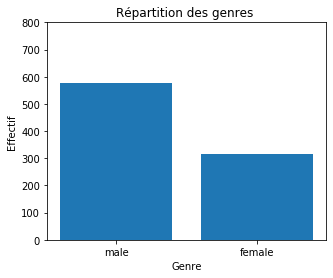

In [28]:
fig, ax1 = plt.subplots(1,1,figsize=(5,4))

ax1.bar(train.Sex.unique(), train.Sex.value_counts())

ax1.set_xlabel("Genre")
ax1.set_ylabel("Effectif")
ax1.set_title("Répartition des genres ")
ax1.set_ylim(0,800)
plt.show()

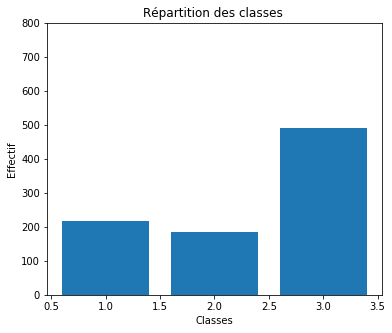

In [29]:
fig, ax1 = plt.subplots(1,1,figsize=(6,5))

ax1.bar(train.Pclass.unique(), train.Pclass.value_counts())

ax1.set_xlabel("Classes")
ax1.set_ylabel("Effectif")
ax1.set_title("Répartition des classes ")
ax1.set_ylim(0,800)
plt.show()

#### Q.10 Qu'est-ce qu'un boxplot (une boite à moustache) ? Chercher sur internet et indiquer les caractéristiques principales 

Réponse: 

# Le box-plot

La valeur centrale du graphique est la médiane (il existe autant de valeur supérieures qu’inférieures à cette valeur dans l’échantillon).

Les bords du rectangle sont les quartiles (Pour le bord inférieur, un quart des observations ont des valeurs plus petites et trois quart ont des valeurs plus grandes, le bord supérieur suit le même raisonnement).

Les extrémités des moustaches sont calculées en utilisant 1.5 fois l’espace interquartile (la distance entre le 1er et le 3ème quartile).
On peut remarquer que 50% des observations se trouvent à l’intérieur de la boîte.

Les valeurs à l’extérieur des moustaches sont représentées par des points. 

> la largeur de la boite est proportionnelle à la taille de l’échantillon. 

> Il est intéressant d’utiliser les box-plot lorsqu’on désire visualiser des conepts tels que la symétrie, la dispersion ou la centralité de la distribution des valeurs associées à une variable.

> Ils sont aussi très intéressant pour comparer des variables basées sur des échelles similaires et pour comparer les valeurs des observations de groupes d’individus sur la même variable.

#### 1.5.1.1 Distribution du prix des tickets

##### Consigne: faire varier l'échelle de prix avec la commande plt.ylim

#### Q.11: Que représente la ligne orange ? Quelle est sa valeur dans ce cas la ? 

la ligne orange est la médiane

#### 1.5.1.2 Distribution de l'âge

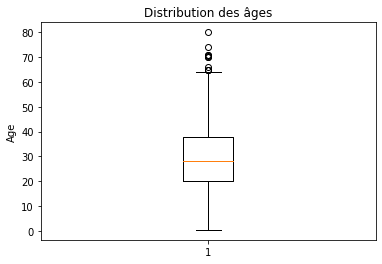

In [30]:
plt.boxplot(train.Age.dropna())
plt.ylabel("Age")
plt.title("Distribution des âges")
plt.show()

#### Q.12 Pourquoi le boxplot ci-dessus ne marche pas ? Corriger le code pour le faire fonctionner

Réponse: à cause de nan qui doit être exclus de la demande

### 1.5.2 Visualisation bidimensionnelle

#### 1.5.2.1 Influence de la classe sur la probabilité de survie


In [31]:
#On utilise groupby pour faire des faire des analyses plus précises 
train.groupby("Pclass")["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


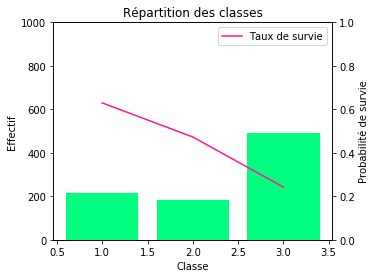

In [32]:
fig, ax1 = plt.subplots(1,1,figsize=(5,4))

ax1.bar(train.Pclass.unique(), train.Pclass.value_counts(), color="springgreen")

ax2 = ax1.twinx()
ax2.plot(train.groupby("Pclass")["Survived"].describe().index, train.groupby("Pclass")["Survived"].describe()["mean"],
        label="Taux de survie",color="deeppink")

ax1.set_xlabel("Classe")
ax1.set_ylabel("Effectif")
ax1.set_title("Répartition des classes")
ax1.set_ylim(0,1000)

ax2.set_ylabel("Probabilité de survie")
ax2.set_ylim(0,1)

plt.legend(loc=0)
plt.show()

In [33]:
train.groupby("Pclass")["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


#### 1.5.2.3 Influence du genre sur la probabilité de survie


#### Q.13 Pas un problème sur ce graphe ?  


Lorsque vous avez un problème ou que vous n'êtes pas sur de votre graphe, regarder individuellement tous les éléments (dataframe) qui composent ce graphe. 

In [34]:
train.groupby("Sex")["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


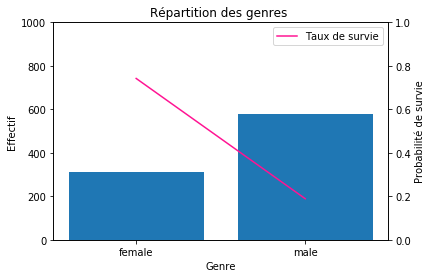

In [39]:
#fig, ax1 = plt.subplots(1,1,figsize=(5,4))
fig = plt.figure()
ax1 = plt.axes()

ax1.bar(train.groupby("Sex")["Survived"].describe().index,
        train.groupby("Sex")["Survived"].describe()["count"])

#La fonction twinx sert à créer un deuxième axe sur un même graphique
ax2 = ax1.twinx()
ax2.plot(train.groupby("Sex")["Survived"].describe().index, 
         train.groupby("Sex")["Survived"].describe()["mean"],
        label="Taux de survie",color="deeppink")

ax1.set_xlabel("Genre")
ax1.set_ylabel("Effectif")
ax1.set_title("Répartition des genres ")
ax1.set_ylim(0,1000)

ax2.set_ylabel("Probabilité de survie")
ax2.set_ylim(0,1)

plt.legend(loc=0)
plt.show()

#### Q.14: Quelle est l'influence du port d'embarquement sur la probabilité de survie ? (faire un graphe comme ci-dessus) 


In [46]:
train.groupby("Embarked")["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


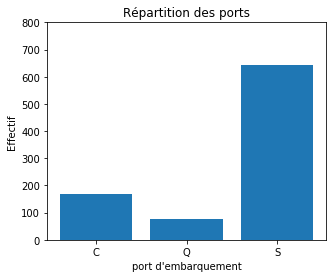

In [40]:
#graphique correspondant à l'effectif en fonction du port d'embarquement.

fig, ax1 = plt.subplots(1,1,figsize=(5,4))

x = train.groupby("Embarked")["Survived"].describe().index
y = train.groupby("Embarked")["Survived"].describe()["count"]

ax1.bar(x, y)

ax1.set_xlabel("port d'embarquement")
ax1.set_ylabel("Effectif")
ax1.set_title("Répartition des ports")
ax1.set_ylim(0,800)
plt.show()

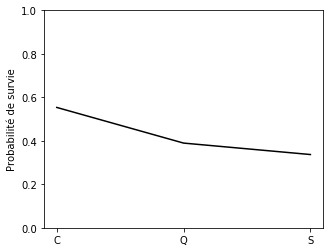

In [43]:
# affichage du plot

fig, ax2 = plt.subplots(1,1,figsize=(5,4))

ax2.plot(train.groupby("Embarked")["Survived"].describe().index, 
         train.groupby("Embarked")["Survived"].describe()["mean"],
        label="Taux de survie",color="black")
ax2.set_ylabel("Probabilité de survie")
ax2.set_ylim(0,1)

plt.show()

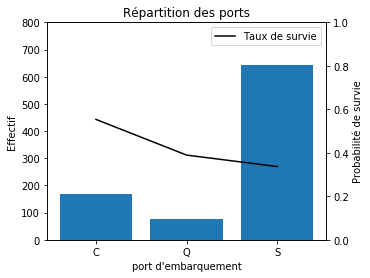

In [45]:
#combinaison du taux de survie par port d'embarquement en fonction de l'effectif.


fig, ax1 = plt.subplots(1,1,figsize=(5,4))

x = train.groupby("Embarked")["Survived"].describe().index
y = train.groupby("Embarked")["Survived"].describe()["count"]

ax1.bar(x, y)

ax2 = ax1.twinx()
ax2.plot(train.groupby("Embarked")["Survived"].describe().index, 
         train.groupby("Embarked")["Survived"].describe()["mean"],
        label="Taux de survie",color="black")

ax1.set_xlabel("port d'embarquement")
ax1.set_ylabel("Effectif")
ax1.set_title("Répartition des ports")
ax1.set_ylim(0,800)

ax2.set_ylabel("Probabilité de survie")
ax2.set_ylim(0,1)

plt.legend(loc=0)
plt.show()

In [46]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Q.15: Quelle est l'influence de l'âge sur la probabilité de survie ?


In [72]:
train.groupby("Age")["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0.42,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
0.67,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
0.75,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
0.83,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
0.92,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
70.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.50,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
71.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


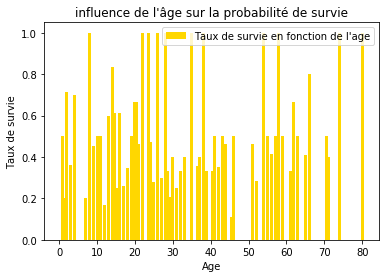

In [72]:
a = train["Age"].dropna().unique()
b = train.groupby("Age")["Survived"].describe()["mean"]
plt.ylabel("Taux de survie")
plt.xlabel("Age")
plt.title("influence de l'âge sur la probabilité de survie")
plt.bar(a,b,color='gold',label="Taux de survie en fonction de l'age")
plt.legend()
plt.show()

#### Q.16: Comment sont corrélées les variables Age et Fare ? Faire un scatter plot 

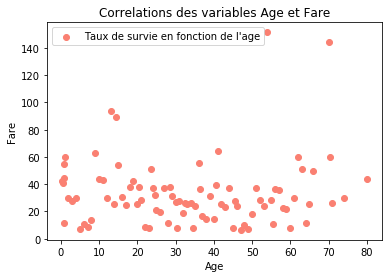

In [66]:
a = train["Age"].dropna().unique()
b = train.groupby("Age")["Fare"].describe()["mean"]
plt.ylabel("Fare")
plt.xlabel("Age")
plt.title("Correlations des variables Age et Fare")
plt.scatter(a,b,color='salmon',label="Taux de survie en fonction de l'age")
plt.legend()
plt.show()

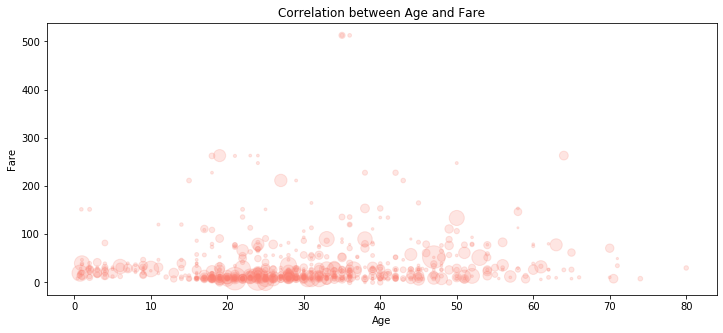

In [48]:
fig, ax = plt.subplots(1,1,figsize=(12,5))

ax.scatter(train.Age, train.Fare, alpha=0.2, color='salmon',s=train.Fare.unique())
ax.set_xlabel('Age')
ax.set_ylabel('Fare')

plt.title('Correlation between Age and Fare')
plt.show()